






Note to self, if it takes too long to run, then just don't run any of the parts that take too long, unless tweaks are applied to the data preprocessing part. You only need to run it once for the output. Hello.

### Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier
from sklearn.metrics import log_loss

## Part A - Model Variety Training

### Import Dataframe

In [2]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\1256870994.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [4]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [5]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [6]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


Raw Model training usually lies here, but we've removed it for convinience.

## Part A - Feature Engineering and Transformation

### Data Cleaning

Check for Duplicates

In [7]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [8]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [9]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [10]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [11]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

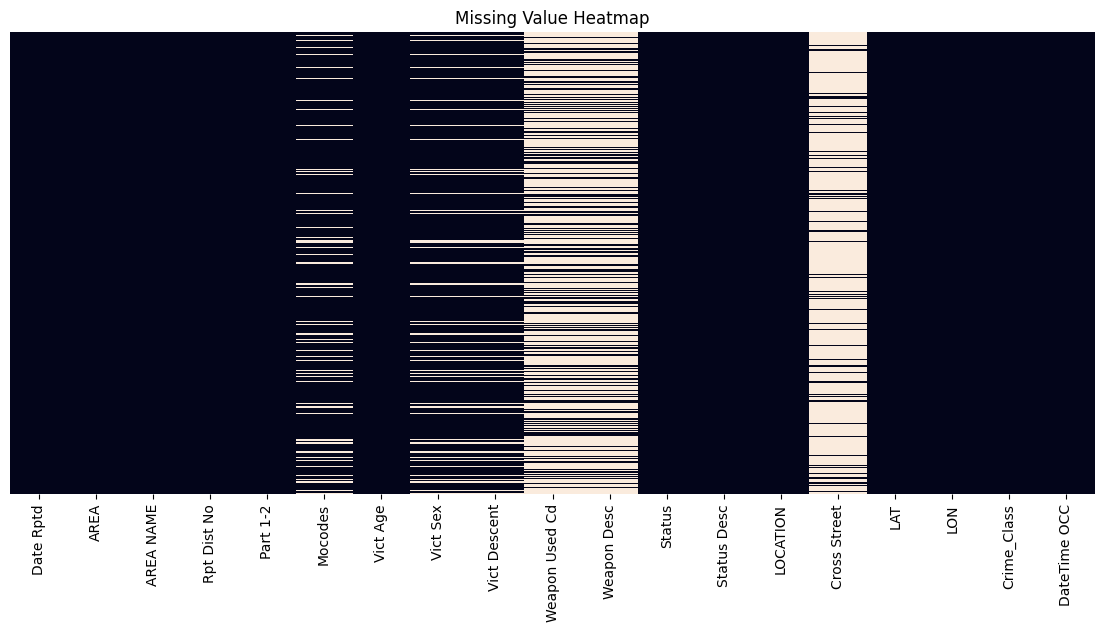

In [12]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [13]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


Check again.

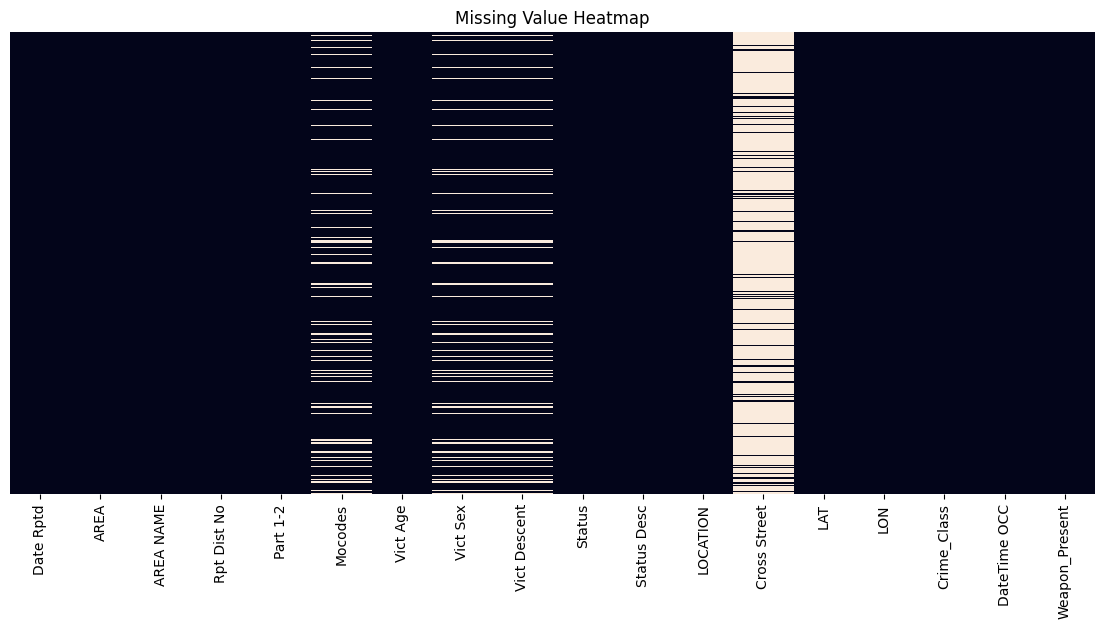

In [14]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


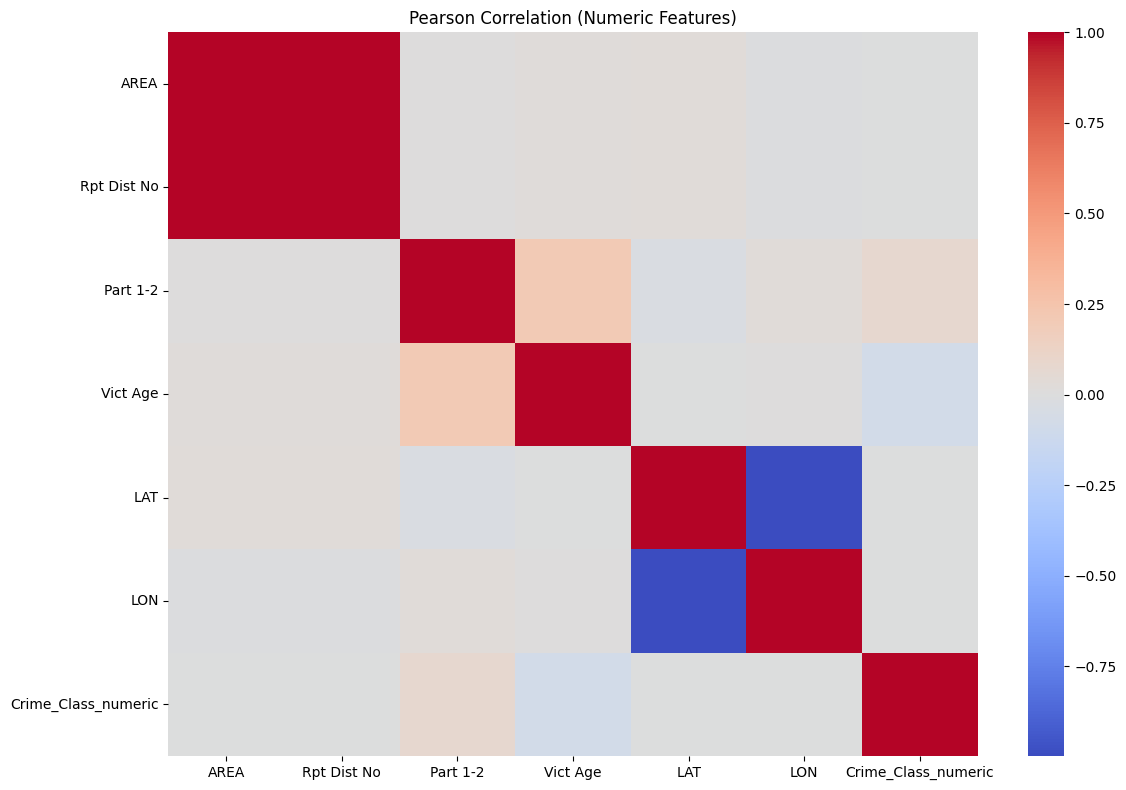

In [15]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [16]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [18]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [19]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [20]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [21]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [22]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is us

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [23]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0321', 'MO_2021', 'MO_0928', 'MO_0602', 'MO_0447', 'MO_1414', 'MO_1258', 'MO_0352', 'MO_0448', 'MO_0361']


In [24]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,1,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [25]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,0,0,0,0,0,0,0,0,1,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,0,0,0,0,0,0,0,0,0,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [26]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [27]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0421,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,1,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,0,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [28]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [29]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0429,MO_1810,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,71
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,1,0,57
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,27
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,33
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,53
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,1,93
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,8
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [30]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\536423381.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\536423381.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [31]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0216,MO_0337,MO_1309,MO_0945,MO_1310,MO_0305,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,71,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,1,0,57,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,27,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,33,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,53,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,1,93,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,8,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

#### Function for Plotting Confusion Matrix. You'll be using this later, so intialize it first.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_crime_matrix(y_test, y_pred, model_name="Model", labels=None):
    """
    Plots a confusion matrix with counts and percentages.
    """
    # Compute matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate percentages for the heatmap annotations
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', 
                xticklabels=labels if labels is not None else "auto",
                yticklabels=labels if labels is not None else "auto")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Crime Class')
    plt.xlabel('Predicted Crime Class')
    plt.show()

## Part A - Remodelling with Processing

Now, let's try building the Models again.

### Tree-Based: Decision Tree (Processed)

In [33]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_dt = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_dt, y_pred_dt, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_dt, y_pred_dt)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9819514906331691
Testing Set Accuracy: 0.8781119609416977
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.987960  0.976778  0.982337  356035.000000
1              0.999951  0.999988  0.999969  163391.000000
2              0.997842  0.994005  0.995920   44202.000000
3              0.908648  0.953081  0.930334   86340.000000
4              0.999779  0.999559  0.999669   13595.000000
5              0.999033  0.998310  0.998671    8282.000000
6              0.999605  0.999408  0.999507   15207.000000
7              0.995265  0.994908  0.995087   13944.000000
8              1.000000  0.981481  0.990654     540.000000
9              1.000000  0.999489  0.999744    1957.000000
accuracy       0.981951  0.981951  0.981951       0.981951
macro avg      0.98

A highly Noticeable increase.

Now, let's plot the Error vs Complexity curve.

This first one shall use a stratified sampling approach.

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import validation_curve
import numpy as np

# Compute log-loss for Decision Tree
train_loss = log_loss(y_train, dt_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_3.predict_proba(X_test))

print("------------------------")
print("Decision Tree Log Loss")
print("------------------------")
print("Training Loss:")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")

# Gap analysis
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss

print("Accuracy Gap (Train - Test):")
print(acc_gap)
print("------------------------")
print("Loss Gap (Test - Train):")
print(loss_gap)
print("------------------------")


# ================================
# 1. FAST STRATIFIED SUBSAMPLING
# ================================
from sklearn.model_selection import train_test_split
import numpy as np

# Take only 5% of the data (tweak 0.05 → 0.02 or 0.01 if still slow)
sample_ratio = 0.25  
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=sample_ratio, 
    stratify=y,
    random_state=42
)

# Split the small subset into train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small,
    test_size=0.3,
    stratify=y_small,
    random_state=42
)

# ==================================
# 2. MODEL COMPLEXITY VS ERROR
# ==================================
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)

    # Fit on *small* dataset
    model.fit(X_train_s, y_train_s)

    # Probabilities
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)

    # Loss
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)

    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

# ================================
# 3. PLOT
# ================================
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()




The second one will use all rows present.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# ----------------------------------------------------
# Convert y → Series so we can subsample safely
# ----------------------------------------------------
y_train = pd.Series(y_train).reset_index(drop=True)
y_test  = pd.Series(y_test).reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)

# ----------------------------------------------------
# Subsample 250k rows for faster computation
# ----------------------------------------------------
sample_size = min(250_000, len(X_train), len(X_test))

X_train_sub = X_train.sample(sample_size, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

X_test_sub = X_test.sample(sample_size, random_state=42)
y_test_sub = y_test.loc[X_test_sub.index]

# ----------------------------------------------------
# Complexity levels (same as original)
# ----------------------------------------------------
complexity_values = [5, 10, 15, 20, 25, 30, 35, None]

train_losses = []
test_losses = []

print("=== Generating Decision Tree Log-Loss vs Complexity Curve ===")

for depth in complexity_values:
    print(f"Training Decision Tree with max_depth={depth}")

    dt_model = DecisionTreeClassifier(
        max_depth=depth,
        random_state=42  # no tuning params, just default DT
    )
    
    dt_model.fit(X_train_sub, y_train_sub)

    # Predict probs so we can compute log-loss
    train_proba = dt_model.predict_proba(X_train_sub)
    test_proba  = dt_model.predict_proba(X_test_sub)

    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_test_sub, test_proba))

# ----------------------------------------------------
# PLOT
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot([str(d) for d in complexity_values], train_losses, marker='o', label="Training Log Loss")
plt.plot([str(d) for d in complexity_values], test_losses, marker='o', label="Testing Log Loss")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Decision Tree Log-Loss vs Complexity Curve (Subsample 250k)")
plt.legend()
plt.grid(True)
plt.show()



### Evaluate Feature Importance (Decision Tree)

In [ ]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

### Perform Shuffle Split Validation to verify the results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import numpy as np

print("=== Decision Tree Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt_model = DecisionTreeClassifier(
        max_depth=6,      # similar to XGB's depth, tweak as needed
        random_state=42
    )

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_dt, y_pred_dt, model_name="Decision Tree", labels=crime_labels)

### Tree-Based: Random Forest (Processed)

*Yawn...

In [ ]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test_rf = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model_3.predict(X_test)
y_pred_train_rf = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test_rf, y_pred_rf, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_rf, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test_rf, y_pred_rf)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

A respectful increment.

### Now, let's validate the results:

Since RF is a very complex and time consuming ML, we'll need to use alternatie validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")


Method 2: Use Stratified Shuffle-Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== Random Forest Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


Plot the error versus complexity curve:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# --- 1. Subsample the data to 250k ---
print("=== Subsampling Training Data ===")
# We verify we have enough data, then sample 250k without replacement
n_samples = min(100000, len(X_train))
X_train_sub, y_train_sub = resample(
    X_train, y_train, 
    n_samples=n_samples, 
    replace=False, 
    random_state=42
)
print(f"Training data reduced to: {X_train_sub.shape[0]} samples")

# --- 2. Define Depth Range (Complexity) ---
# We range from depth 1 (very simple) to 25 (very complex)
depth_settings = range(1, 501) #Adjust to larger value range if needed

train_errors = []
test_errors = []

print("=== Generating Error vs Complexity (Max Depth) Curve ===")

for d in depth_settings:
    print(f"Training model with max_depth={d}")

    rf = RandomForestClassifier(
        n_estimators=50,  # Fixed: We isolate depth as the variable
        max_depth=d,      # Variable: This controls complexity
        random_state=42,
        n_jobs=-1
    )
    
    # Fit on the subsampled data
    rf.fit(X_train_sub, y_train_sub)

    # Predict
    train_pred = rf.predict(X_train_sub)
    test_pred  = rf.predict(X_test)

    # Compute error (1 - accuracy)
    train_err = 1 - accuracy_score(y_train_sub, train_pred)
    test_err  = 1 - accuracy_score(y_test, test_pred)

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- 3. Plot ---
plt.figure(figsize=(10, 6))

# Plotting the curves
plt.plot(depth_settings, train_errors, marker='o', label="Training Error", color='blue')
plt.plot(depth_settings, test_errors, marker='o', label="Testing Error", color='red')

# Formatting
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Random Forest: Error vs. Max Depth")
plt.xticks(depth_settings) # Ensure we see all depth ticks
plt.legend()
plt.grid(True)

plt.show()




 ### Evaluate Feature Importance (Random Forest)

In [ ]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_rf, y_pred_rf, model_name="Random Forest", labels=crime_labels)

### Probabilistic: Logistic Regression (Processed)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64 (if any exist)
# Using 'view' on datetimes is fast and memory efficient
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
# (Necessary because lists are not hashable and break many functions)
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (The "Pro" way to avoid MemoryError)
# We loop instead of using .apply() to save RAM
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# Logistic Regression cannot handle NaNs. 
# Since we used cat.codes, NaNs are already -1, but we ensure everything is numeric.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_lr = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# Logistic Regression works best when features are on the same scale (e.g., -1 to 1)
print("Scaling data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Logistic Regression Model
print("Training Logistic Regression...")
lr_model_1 = LogisticRegression() # Default parameters

# Train model
lr_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = lr_model_1.predict(X_train_scaled)
y_pred_test_lr = lr_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_lr, y_pred_test_lr, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_lr, y_pred_test_lr)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data...
Training Logistic Regression...


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicting...
Training Set Accuracy: 0.8994830083597136
Testing Set Accuracy: 0.8982978328214449
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.933845  0.935852  0.934847  356035.000000
1              0.921360  0.962807  0.941628  163391.000000
2              0.819256  0.529953  0.643588   44202.000000
3              0.815259  0.950880  0.877862   86340.000000
4              0.745560  0.700919  0.722551   13595.000000
5              0.834315  0.513161  0.635467    8282.000000
6              0.946154  0.905899  0.925589   15207.000000
7              0.647402  0.605709  0.625861   13944.000000
8              0.500000  0.003704  0.007353     540.000000
9              0.634500  0.379663  0.475064    1957.000000
accuracy       0.899483  0.899483  0.899483       0.899483
macro

### Probabilistic: Naive Bayes (Processed)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # <--- Changed from StandardScaler
from sklearn.naive_bayes import MultinomialNB   # <--- The Model
from sklearn.metrics import classification_report, accuracy_score

# 1. Setup Data
# (Assuming df_new_1 is already loaded)
df_model_2 = df_new_1.copy()

# 2. Prepare X and y
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# 3. Pre-processing (Memory Safe Version)

# A. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Factorize Objects (Using cat.codes for memory efficiency)
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# D. Handle Missing Values
# We stick to your logic, but Naive Bayes hates -1.
# We will fix the -1s in the Scaling step below.
X = X.fillna(-1)

# 4. Train-test split
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Scale features 
# CRITICAL CHANGE: MultinomialNB fails with negative numbers.
# StandardScaler produces negatives. MinMaxScaler (0, 1) fixes this.
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Build Naive Bayes Model
print("Training Multinomial Naive Bayes...")
nb_model_1 = MultinomialNB() 

# Train model
nb_model_1.fit(X_train_scaled, y_train)

# 7. Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# 8. Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Encoding columns...
Scaling data (MinMax)...
Training Multinomial Naive Bayes...
Predicting...
Training Set Accuracy: 0.871889272530075
Testing Set Accuracy: 0.8713689643049042
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.935642  0.916253  0.925846  356035.000000
1              0.886901  0.902675  0.894719  163391.000000
2              0.672489  0.514750  0.583141   44202.000000
3              0.822126  0.945321  0.879430   86340.000000
4              0.502667  0.630747  0.559470   13595.000000
5              0.778507  0.501207  0.609813    8282.000000
6              0.903444  0.895246  0.899326   15207.000000
7              0.534854  0.595382  0.563497   13944.000000
8              0.085106  0.022222  0.035242     540.000000
9              0.275608  0.324476  0.298052

Perform Shuffle-Split Validation for both LR anmd NB models:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the Splitter (Same for both)
# 5 Splits is a good balance between speed and reliability
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

print("=========================================================")
print("1. Logistic Regression Validation (StandardScaler)")
print("=========================================================")

lr_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data (Memory efficient indexing)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (Critical: Fit on Train, Transform Test)
    # StandardScaler is best for Logistic Regression speed/convergence
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train (n_jobs=-1 uses all CPU cores for speed)
    lr = LogisticRegression(n_jobs=-1) 
    lr.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, lr.predict(X_test_scaled))
    
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    lr_accuracies.append(acc)
    fold += 1

print(f"LR Mean Accuracy:  {np.mean(lr_accuracies):.8f}")
print(f"LR Std Deviation:  {np.std(lr_accuracies):.8f}")


print("\n=========================================================")
print("2. Multinomial Naive Bayes Validation (MinMaxScaler)")
print("=========================================================")

nb_accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    # 1. Slice Data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 2. Scale (MinMaxScaler is REQUIRED for NB to avoid negative errors)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Train
    nb = MultinomialNB()
    nb.fit(X_train_scaled, y_train)

    # 4. Score
    acc = accuracy_score(y_test, nb.predict(X_test_scaled))

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    nb_accuracies.append(acc)
    fold += 1

print(f"NB Mean Accuracy:  {np.mean(nb_accuracies):.8f}")
print(f"NB Std Deviation:  {np.std(nb_accuracies):.8f}")
print("---------------------------------------------------------")

Plot the error vs complexity curve

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import validation_curve, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# ==========================================
# 1. Prepare Data (250K Subsample)
# ==========================================
print("Subsampling 250k rows...")
# Sample first to save time on preprocessing
df_sub = df_new_1.sample(n=250000, random_state=42).copy()

# Clean up leakage columns
drop_cols = [
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Crime_Class"
]
cols_to_drop = [c for c in drop_cols if c in df_sub.columns]

# Prepare X and y
y, _ = pd.factorize(df_sub["Crime_Class"])
X = df_sub.drop(columns=cols_to_drop) # Drop target + leakage

# --- Preprocessing (Optimized) ---
# 1. Convert datetimes to int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# 2. Convert list columns to strings
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# 3. Factorize Objects (cat.codes)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# 4. Handle NaNs/Negatives
# Logistic Regression handles -1 fine (as a number), 
# but NB needs positive. We'll rely on MinMaxScaler for NB later.
X = X.fillna(-1)

# ==========================================
# 2. Setup Models & Validation
# ==========================================

# Splitter: 3 splits is enough for a curve plot (saves time vs 5)
cv_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Pipeline 1: Logistic Regression (Standard Scaler)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, n_jobs=-1))
])
# Test C from 0.001 (Simple) to 100 (Complex)
param_range_lr = np.logspace(-3, 5, 9) 

# Pipeline 2: Naive Bayes (MinMax Scaler)
pipe_nb = Pipeline([
    ('scaler', MinMaxScaler()), # Fixes negative numbers for NB
    ('nb', MultinomialNB())
])
# Test Alpha from 0.001 (Complex) to 100 (Simple)
param_range_nb = np.logspace(-3, 5, 9) 

# ==========================================
# 3. Compute Curves
# ==========================================
print("Computing LR Complexity Curve...")
train_scores_lr, test_scores_lr = validation_curve(
    pipe_lr, X, y, 
    param_name="lr__C", 
    param_range=param_range_lr,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

print("Computing NB Complexity Curve...")
train_scores_nb, test_scores_nb = validation_curve(
    pipe_nb, X, y, 
    param_name="nb__alpha", 
    param_range=param_range_nb,
    scoring="neg_log_loss", 
    cv=cv_split, n_jobs=-1
)

# Helper to process scores (flip sign for Log Loss)
def process_scores(scores):
    return -np.mean(scores, axis=1), np.std(scores, axis=1)

train_mean_lr, train_std_lr = process_scores(train_scores_lr)
test_mean_lr, test_std_lr = process_scores(test_scores_lr)
train_mean_nb, train_std_nb = process_scores(train_scores_nb)
test_mean_nb, test_std_nb = process_scores(test_scores_nb)

# ==========================================
# 4. Plotting
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LR Plot
axes[0].plot(param_range_lr, train_mean_lr, label="Training", color="darkorange", marker='o')
axes[0].plot(param_range_lr, test_mean_lr, label="Validation", color="navy", marker='o')
axes[0].fill_between(param_range_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, alpha=0.2, color="darkorange")
axes[0].fill_between(param_range_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.2, color="navy")
axes[0].set_title("Logistic Regression (Parameter: C)")
axes[0].set_xlabel("C (Low=Regulated, High=Complex)")
axes[0].set_ylabel("Log Loss (Lower is Better)")
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)

# NB Plot
axes[1].plot(param_range_nb, train_mean_nb, label="Training", color="darkorange", marker='o')
axes[1].plot(param_range_nb, test_mean_nb, label="Validation", color="navy", marker='o')
axes[1].fill_between(param_range_nb, train_mean_nb - train_std_nb, train_mean_nb + train_std_nb, alpha=0.2, color="darkorange")
axes[1].fill_between(param_range_nb, test_mean_nb - test_std_nb, test_mean_nb + test_std_nb, alpha=0.2, color="navy")
axes[1].set_title("Naive Bayes (Parameter: Alpha)")
axes[1].set_xlabel("Alpha (Low=Complex, High=Smoothed)")
axes[1].set_ylabel("Log Loss (Lower is Better)")
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

plt.show()

Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_lr, y_pred_test_lr, model_name="Logistic Regression", labels=crime_labels)
plot_crime_matrix(y_test_nb, y_pred_test_nb, model_name="Naive Bayes", labels=crime_labels)

### XGBoost (Processed)

In [36]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test_xgb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_2 = XGBClassifier()

xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_2.predict(X_train)
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_xgb, y_pred_xgb, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test_xgb, y_pred_xgb)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9191321022384018
Testing Set Accuracy: 0.9145267961976531
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.955065  0.936473  0.945677  356035.000000
1              0.942535  0.977135  0.959523  163391.000000
2              0.849471  0.655966  0.740282   44202.000000
3              0.819817  0.959254  0.884071   86340.000000
4              0.804821  0.788305  0.796477   13595.000000
5              0.878661  0.608549  0.719075    8282.000000
6              0.944647  0.938186  0.941405   15207.000000
7              0.740664  0.741036  0.740850   13944.000000
8              0.955556  0.079630  0.147009     540.000000
9              0.777055  0.671436  0.720395    1957.000000
accuracy       0.919132  0.919132  0.919132       0.919132
macro avg      0.86

Good Increase.

### Validate the results:

We'll apply the samne validation methods to ensure time and compuational efficiency.

Method 1: Use Subsamples for Cross Validation.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Take a manageable subsample
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
fold = 1

print("=== XGBoost Stratified K-Fold Validation ===")

for train_idx, test_idx in skf.split(X_sub, y_sub):
    X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
    y_train, y_test = y_sub[train_idx], y_sub[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # you can adjust
        max_depth=6,                # default is 6
        learning_rate=0.1,          # default
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    acc = accuracy_score(y_test, xgb_model.predict(X_test))
    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accs.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("K-Fold CV Accuracy Mean:", np.mean(accs))
print("Std:", np.std(accs))
print("---------------------------------------------------------")



Method 2: Use Stratified Shuffle-Split

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("=== XGBoost Cross-Validation: Stratified Shuffle-Split ===")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    xgb_model = XGBClassifier(
        n_estimators=100,           # adjust as needed
        max_depth=6,                # adjust as needed
        learning_rate=0.1,
        n_jobs=-1,
        use_label_encoder=False,    # avoids warning
        eval_metric="mlogloss",     # suitable for multiclass
        tree_method="hist",         # faster for large datasets
        random_state=42
    )

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")



Confusion Matrix:

In [ ]:
# 1. Get the class names (optional, makes the plot readable)
crime_labels = df_new_1["Crime_Class"].unique()
crime_labels.sort() # Ensure they are in the same order as factorize usually does

# 2. Plot the matrix
# Ensure you pass the predictions you just made (y_pred_test)
plot_crime_matrix(y_test_xgb, y_pred_xgb, model_name="XGBoost", labels=crime_labels)

#### Plot the Complexity vs Error Curve

In [ ]:
df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# OPTIONAL: SUBSAMPLE 250K rows for SPEED
# ============================================================

subset = 250_000
# Convert y_train into a Pandas Series with matching indices
y_train_series = pd.Series(y_train, index=X_train.index)

subset = 250_000
if len(X_train) > subset:
    X_train_sub = X_train.sample(subset, random_state=42)
    y_train_sub = y_train_series.loc[X_train_sub.index]
else:
    X_train_sub = X_train
    y_train_sub = y_train_series



# ============================================================
# CREATE CURVE (DEPTH 1 to 50)
# ============================================================

max_depths = range(1, 51)
train_losses = []
test_losses = []

for d in max_depths:
    print(f"Training XGBoost with max_depth={d} ...")

    model = XGBClassifier(
        max_depth=d,
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(np.unique(y)),
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_sub, y_train_sub)

    # Predict PROBABILITIES
    y_train_prob = model.predict_proba(X_train_sub)
    y_test_prob = model.predict_proba(X_test)

    # Log-loss
    train_losses.append(log_loss(y_train_sub, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


# ============================================================
# PLOT THE CURVE
# ============================================================

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_losses, label="Training Log-Loss")
plt.plot(max_depths, test_losses, label="Validation Log-Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log-Loss Error")
plt.title("XGBoost Complexity Curve (1–50 Depth)")
plt.legend()
plt.grid(True)
plt.show()

### Evaluate Feature Importance (XGBoost)

In [ ]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = xgb_model_2.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


## Category: Deep Learning Models



### Neural Networks: CNN (Proessed)

In [37]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
cnn_model_2 = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = cnn_model_2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = cnn_model_2.predict(X_train_cnn).argmax(axis=1)
y_pred_test = cnn_model_2.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2039213715.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 165s 9ms/step - accuracy: 0.9010 - loss: 0.3124 - val_accuracy: 0.9098 - val_loss: 0.2767
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 163s 9ms/step - accuracy: 0.9087 - loss: 0.2798 - val_accuracy: 0.9122 - val_loss: 0.2642
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 170s 10ms/step - accuracy: 0.9106 - loss: 0.2726 - val_accuracy: 0.9130 - val_loss: 0.2613
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 166s 9ms/step - accuracy: 0.9112 - loss: 0.2689 - val_accuracy: 0.9124 - val_loss: 0.2619
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 167s 9ms/step - accuracy: 0.9119 - loss: 0.2665 - val_accuracy: 0.9138 - val_loss: 0.2584
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 175s 10ms/step - accuracy: 0.9125 - loss: 0.2645 - val_accuracy: 0.9138 - val_loss: 0.2575
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 173s 10ms/step - accuracy: 0.9128 - loss: 0.2629 - val_accuracy: 0.9144 - val_loss: 0.2563
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 177s 10ms/step 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9159124539974101
Testing Set Accuracy: 0.9129015781199212
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.958800  0.935751  0.947135  356035.000000
1              0.946160  0.968646  0.957271  163391.000000
2              0.849495  0.637958  0.728685   44202.000000
3              0.819986  0.958663  0.883918   86340.000000
4              0.768069  0.796543  0.782047   13595.000000
5              0.783788  0.596595  0.677499    8282.000000
6              0.949414  0.917012  0.932932   15207.000000
7              0.619571  0.805077  0.700246   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.715616  0.510475  0.595884    1957.000000
accuracy       0.915912  0.915912  0.915912       0.915912
macro avg      0.74

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

#### Perform Validation:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# Use a smaller subsample if your dataset is very large
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Stratified Shuffle-Split
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)  # fewer splits due to time

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_cnn, y_sub):
    print(f"=== Fold {fold} ===")
    
    X_train, X_test = X_cnn[train_idx], X_cnn[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train
    cnn_model.fit(
        X_train, y_train,
        epochs=5,           # keep low for faster CV
        batch_size=32,
        verbose=0           # silent training for CV
    )

    # Evaluate
    y_pred = cnn_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


#### Plot the error versus complexity curve.

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Use a smaller subsample for speed
sample_size = 50_000  # adjust as needed
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Complexity levels (number of filters in first Conv1D layer)
complexity_values = [8, 16, 32, 64, 128]

train_errors = []
test_errors = []

print("=== Generating CNN Error vs Complexity Curve ===")

for filters in complexity_values:
    print(f"Training CNN with {filters} filters in first Conv1D layer")

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    cnn_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (fewer epochs for faster evaluation)
    cnn_model.fit(
        X_cnn, y_cat,
        epochs=5,
        batch_size=32,
        verbose=0  # silent training
    )

    # Predict
    y_pred_train = cnn_model.predict(X_cnn).argmax(axis=1)
    y_true = y_sub
    train_err = 1 - accuracy_score(y_true, y_pred_train)

    # Optional: split a small testing subset for speed
    test_idx = np.random.choice(len(X_cnn), size=int(0.2*len(X_cnn)), replace=False)
    X_test_small = X_cnn[test_idx]
    y_test_small = y_sub[test_idx]
    y_test_cat_small = y_cat[test_idx]

    y_pred_test = cnn_model.predict(X_test_small).argmax(axis=1)
    test_err = 1 - accuracy_score(y_test_small, y_pred_test)

    train_errors.append(train_err)
    test_errors.append(test_err)

# ---- Plot ----
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, train_errors, marker='o', label="Training Error")
plt.plot(complexity_values, test_errors, marker='o', label="Testing Error")
plt.xlabel("CNN Complexity (Number of Filters in First Conv1D Layer)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("CNN Error vs Complexity Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# ====== COMPUTE PROBABILITIES ======
train_proba = cnn_model_2.predict(X_train_cnn)
test_proba  = cnn_model_2.predict(X_test_cnn)

# ====== COMPUTE LOG LOSS ======
train_loss = log_loss(y_train, train_proba)
test_loss  = log_loss(y_test,  test_proba)

print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")

# ====== PLOT TRAINING vs VALIDATION LOSS FROM HISTORY ======
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve (CNN)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# ======================================================
# 1. TAKE A SMALL SUBSET TO AVOID HOURS OF TRAINING
# ======================================================
subset = 50000   # Use 50k rows for speed (change if needed)

X_train_sub = X_train_cnn[:subset]
y_train_sub = y_train[:subset]
y_train_sub_cat = y_train_cat[:subset]

X_val_sub = X_test_cnn[:20000]
y_val_sub = y_test[:20000]
y_val_sub_cat = y_test_cat[:20000]

# ======================================================
# 2. DEFINE COMPLEXITY LEVELS (NUMBER OF FILTERS)
# ======================================================
complexities = [8, 16, 32, 64, 128]

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ======================================================
# 3. LOOP THROUGH MODEL COMPLEXITIES
# ======================================================
for filters in complexities:

    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu',
               input_shape=(X_train_sub.shape[1], 1)),
        MaxPooling1D(pool_size=2),

        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        Flatten(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # short training for speed
    model.fit(
        X_train_sub, y_train_sub_cat,
        epochs=3,          # small number for speed
        batch_size=64,
        verbose=0
    )

    # Predictions
    train_proba = model.predict(X_train_sub, verbose=0)
    test_proba  = model.predict(X_val_sub,   verbose=0)

    y_train_pred = np.argmax(train_proba, axis=1)
    y_test_pred  = np.argmax(test_proba, axis=1)

    # Metrics
    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_val_sub,  test_proba))

    train_accs.append(accuracy_score(y_train_sub, y_train_pred))
    test_accs.append(accuracy_score(y_val_sub,  y_test_pred))


# ======================================================
# 4. PLOT COMPLEXITY vs ERROR
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(complexities, train_losses, label="Training Loss")
plt.plot(complexities, test_losses, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Filters)")
plt.ylabel("Log Loss")
plt.title("CNN Model Complexity vs Error")
plt.legend()
plt.show()


### Neural Network: ANN (Processed)

In [ ]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_31080\2866109942.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.4091

Validation Time. :)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# ============================================================
# Optional subsample for speed (same as CNN version)
# ============================================================
sample_size = 100_000
X_sub = X.sample(sample_size, random_state=42)
y_sub = y[X_sub.index]

# ============================================================
# Scale features
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# One-hot encode labels
num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# ============================================================
# Stratified Shuffle-Split
# ============================================================
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X_scaled, y_sub):
    print(f"=== Fold {fold} ===")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]

    # ============================================================
    # Build ANN model (matching your original architecture)
    # ============================================================
    ann_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    ann_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Train (silent for CV)
    ann_model.fit(
        X_train, y_train,
        epochs=5,          # reduced for faster CV, same as CNN version
        batch_size=32,
        verbose=0
    )

    # Predict + evaluate
    y_pred = ann_model.predict(X_test).argmax(axis=1)
    y_true = y_sub[test_idx]
    acc = accuracy_score(y_true, y_pred)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    accuracies.append(acc)
    fold += 1

# ============================================================
# Summary
# ============================================================
print("---------------------------------------------------------")
print("CV Accuracy Mean:", np.mean(accuracies))
print("CV Accuracy Std:", np.std(accuracies))
print("---------------------------------------------------------")


Curve Check.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ============================================================
# 1. Prepare Data (Updated for 250k)
# ============================================================
print("=== Preparing Data ===")
# Ensure we don't sample more than we have
sample_size = min(250_000, len(X))

# Assuming X is a DataFrame (based on your .sample code)
X_sub = X.sample(n=sample_size, random_state=42)
y_sub = y[X_sub.index] # Align y with X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

num_classes = len(np.unique(y_sub))
y_cat = to_categorical(y_sub, num_classes)

# Split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.3, random_state=42, stratify=y_sub
)

# ============================================================
# 2. Complexity levels (Wider Range)
# ============================================================
# We go from very simple (10) to very complex (800) to force the curve
complexity_levels = [10, 50, 150, 400, 800]

train_losses = []
val_losses = []

print(f"=== Starting Training Loop (Subsample: {sample_size}) ===")

# ============================================================
# 3. Train ANN for each complexity level
# ============================================================
for units in complexity_levels:
    print(f"Training model with {units} neurons...")

    model = Sequential([
        # INCREASED COMPLEXITY:
        # We use a single massive layer.
        # CRITICAL: We REMOVED Dropout to allow overfitting.
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # INCREASED EPOCHS:
    # We need enough time for the big models to memorize the noise.
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Increased from 5 to 20
        batch_size=64, # Slightly larger batch for speed
        validation_data=(X_val, y_val),
        verbose=0
    )

    # Store final epoch losses
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

# ============================================================
# 4. Plot Error vs Complexity
# ============================================================
plt.figure(figsize=(10, 6))

# Plot lines
plt.plot(complexity_levels, train_losses, marker='o', label='Training Loss (Bias)', color='blue')
plt.plot(complexity_levels, val_losses, marker='o', label='Validation Loss (Variance)', color='orange')

plt.title("Bias-Variance Tradeoff: ANN Complexity")
plt.xlabel("Model Complexity (Neurons in Hidden Layer)")
plt.ylabel("Log Loss (Lower is Better)")
plt.xticks(complexity_levels) # Show exact x-axis values
plt.grid(True)
plt.legend()

plt.show()

## Part B - Parameters

### Now, let's implement Hyperparameter Tuning:

This will take a while as well.

### Naive Bayes (Processed & Tunned)

WARNING: DO NOT ATTEMPT THIS using the full 1 Milliom. Unless you'd like your laptop to crash over and over again.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------
# 1. Setup Data (Assuming df_new_1 already exists)
# ----------------------------------------------------
df_model_2 = df_new_1.copy()

# ----------------------------------------------------
# 2. Prepare X and y
# ----------------------------------------------------
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ----------------------------------------------------
# 3. Pre-processing (Memory Safe)
# ----------------------------------------------------

# A. Datetime → int64
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].values.astype(np.int64)

# B. List columns → str
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# C. Object columns → category codes
print("Encoding columns...")
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].astype("category").cat.codes

# D. Missing values → -1
# (safe because MinMaxScaler shifts everything to 0–1)
X = X.fillna(-1)

# ----------------------------------------------------
# 4. Train–Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5. Scaling
# ----------------------------------------------------
print("Scaling data (MinMax)...")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6. Manual Alpha Search (Safe & Lightweight)
# ----------------------------------------------------
alphas = [0.1, 0.5, 1.0, 2.0, 5.0,10.0]
best_alpha = None
best_acc = 0

print("\nSearching for best alpha...")

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_nb, y_pred)

    print(f"Alpha={alpha} → Test Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

print(f"\nBest Alpha Found: {best_alpha} (Accuracy={best_acc:.4f})")

# ----------------------------------------------------
# 7. Train Final Model
# ----------------------------------------------------
print("\nTraining final MultinomialNB model...")
nb_model_1 = MultinomialNB(alpha=best_alpha)
nb_model_1.fit(X_train_scaled, y_train)

# Predict
print("Predicting...")
y_pred_train_1 = nb_model_1.predict(X_train_scaled)
y_pred_test_nb = nb_model_1.predict(X_test_scaled)

# ----------------------------------------------------
# 8. Evaluation
# ----------------------------------------------------
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test_nb, y_pred_test_nb)

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test_nb, y_pred_test_nb, output_dict=True)
).transpose()

print("\n------------------------------------------------------------------------------------")
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


### XGBoost (Processed & Parameters)

In [ ]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

print("=== XGBOOST Cross-Validation: Stratified Shuffle-Split ===\n")

# ------------------------------------------------------------
# Use your tuned parameters
# ------------------------------------------------------------
best_params = search.best_params_
print("Using Best Params:", best_params, "\n")

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

accuracies = []
fold = 1

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # --------------------------------------------------------
    # XGBoost model with best params
    # --------------------------------------------------------
    xgb_cv = XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y)),
        eval_metric="mlogloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    xgb_cv.fit(X_train_cv, y_train_cv)

    # Predict
    y_pred = xgb_cv.predict(X_test_cv)

    # Accuracy
    acc = accuracy_score(y_test_cv, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Accuracy = {acc:.4f}")
    fold += 1

print("---------------------------------------------------------")
print("Mean Accuracy:  ", np.mean(accuracies))
print("Std Deviation: ", np.std(accuracies))
print("---------------------------------------------------------")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# -------------------------------
# 1. Use a subset for speed
# -------------------------------
subset_size = 250_000  # <--- UPDATED to 250k
print(f"Subsampling {subset_size} rows...")
X_sub = X.sample(subset_size, random_state=42)
y_sub = y[X_sub.index] # Ensure target aligns with sampled X

# -------------------------------
# 2. Complexity range (max_depth)
# -------------------------------
# Range 1 to 50 with step 5 (1, 6, 11... 46, 51)
depth_values = range(1, 51, 5) 
train_errors = []
test_errors = []

# Base tuned params (Make sure 'search' is defined or replace this line!)
base_params = search.best_params_.copy()

# -------------------------------
# 3. Stratified Shuffle-Split
# -------------------------------
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

for depth in depth_values:
    fold_train_errors = []
    fold_test_errors = []
    print(f"Testing max_depth = {depth}...")

    for train_idx, test_idx in sss.split(X_sub, y_sub):
        X_train_cv, X_test_cv = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        y_train_cv, y_test_cv = y_sub.iloc[train_idx], y_sub.iloc[test_idx]

        # Update params for this specific loop
        params = base_params.copy()
        params["max_depth"] = depth

        model = XGBClassifier(
            objective="multi:softmax",
            num_class=len(np.unique(y_sub)),
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1,
            **params
        )

        model.fit(X_train_cv, y_train_cv)

        # Predictions
        y_pred_train = model.predict(X_train_cv)
        y_pred_test  = model.predict(X_test_cv)

        # Calculate Error (1 - Accuracy)
        fold_train_errors.append(1 - accuracy_score(y_train_cv, y_pred_train))
        fold_test_errors.append(1 - accuracy_score(y_test_cv, y_pred_test))

    # Average over folds
    train_errors.append(np.mean(fold_train_errors))
    test_errors.append(np.mean(fold_test_errors))

# -------------------------------
# 4. Plot
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_errors, marker='o', label="Training Error")
plt.plot(depth_values, test_errors, marker='o', label="Test Error")

plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - accuracy)")
plt.title(f"XGBoost Error vs Model Complexity (Subset: {subset_size:,} rows)")
plt.legend()
plt.grid(True)
plt.show()

### ANN (Hyperparamters)

Perform the Shuffle-Split Validation:

*Note, if it shows error X_train_scaled is not defined, run the top ANN (Processed) model first.

In [ ]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# ============================================================
# 1. Define a lightweight search space
# ============================================================

param_space = {
    "lr": [1e-3, 3e-4, 1e-4],
    "hidden_1": [64, 96, 128],
    "hidden_2": [32, 48, 64],
    "dropout": [0.2, 0.3, 0.4],
    "batch_size": [32, 64, 128]
}


# ============================================================
# 2. Function to build a model from hyperparameters
# ============================================================

def build_model(params):
    model = Sequential([
        Dense(params["hidden_1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(params["dropout"]),

        Dense(params["hidden_2"], activation='relu'),
        Dropout(params["dropout"]),

        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=params["lr"]),
        metrics=['accuracy']
    )
    return model


# ============================================================
# 3. LIGHTWEIGHT BEST PARAMS SEARCH
#    (Random sampling + short training + early stopping)
# ============================================================

def sample_params():
    return {
        "lr": random.choice(param_space["lr"]),
        "hidden_1": random.choice(param_space["hidden_1"]),
        "hidden_2": random.choice(param_space["hidden_2"]),
        "dropout": random.choice(param_space["dropout"]),
        "batch_size": random.choice(param_space["batch_size"])
    }

search_results = []
N_SEARCH = 4   # Only 4 trials → FAST & LIGHT, it strikes a decent balance; or set to a smaller value if time is a concern (Such as 3), or to a a larger value if you have more time (Such as 5-10)

print("\n========== STARTING BEST PARAMS SEARCH ==========\n")

for i in range(N_SEARCH):
    params = sample_params()
    print(f"Trial {i+1}/{N_SEARCH}: {params}")

    model = build_model(params)

    es = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # SHORT training for search only
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=8,
        batch_size=params["batch_size"],
        validation_split=0.2,
        verbose=0,
        callbacks=[es]
    )

    val_acc = max(history.history["val_accuracy"])
    search_results.append((val_acc, params))

    print(f" → Best Val Accuracy: {val_acc:.4f}\n")

# ============================================================
# 4. Select best params
# ============================================================

best_val, best_params = max(search_results, key=lambda x: x[0])
print("\n========== BEST PARAMS FOUND ==========")
print(best_params)
print("Best Validation Accuracy:", best_val)


# ============================================================
# 5. Train FINAL MODEL with best params
# ============================================================

print("\n========== TRAINING FINAL MODEL ==========\n")

final_model = build_model(best_params)

es_final = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_final = final_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=25,
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)


# ============================================================
# 6. Evaluate
# ============================================================

y_pred_train = final_model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = final_model.predict(X_test_scaled).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\n===== TRAINING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose())

print("\n===== TESTING REPORT =====")
print(pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose())


In [ ]:
# ============================================================
#                📌 FULL ANN PIPELINE 
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# ============================================================
# PREPROCESSING
# ============================================================

df_model_2 = df_new.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime → int64
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# Convert lists → strings
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ============================================================
# BEST PARAMS (From your search)
# ============================================================
best_params = {
    "layer1": 128,
    "layer2": 64,
    "layer3": 32,
    "dropout": 0.3,
    "batch_size": 32,
    "epochs": 10,       # base training
    "lr": 0.001         # default Adam LR
}

# ============================================================
# MODEL BUILDER FUNCTION
# ============================================================

def build_ann():
    model = Sequential([
        Dense(best_params["layer1"], activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer2"], activation='relu'),
        Dropout(best_params["dropout"]),

        Dense(best_params["layer3"], activation='relu'),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

# ============================================================
# TRAIN FINAL MODEL
# ============================================================

model = build_ann()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    validation_split=0.2,
    verbose=1
)

# Predict
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# Evaluation
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

print("\nTRAIN REPORT")
print(pd.DataFrame.from_dict(classification_report(y_train, y_pred_train, output_dict=True)).transpose())

print("\nTEST REPORT")
print(pd.DataFrame.from_dict(classification_report(y_test, y_pred_test, output_dict=True)).transpose())

# ============================================================
# SHUFFLE-SPLIT CROSS VALIDATION (FAST + MEMORY EFFICIENT)
# ============================================================

def ann_shuffle_split_cv(n_splits=5):

    ss = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    accuracies = []

    fold = 1
    for train_idx, val_idx in ss.split(X_train_scaled):

        print(f"\n===== ShuffleSplit Fold {fold}/{n_splits} =====")

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

        model_cv = build_ann()

        es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        model_cv.fit(
            X_tr, y_tr,
            epochs=12,  # small for speed
            batch_size=best_params["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0,
            callbacks=[es]
        )

        loss, acc = model_cv.evaluate(X_val, y_val, verbose=0)
        print(f"Fold Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    accuracies = np.array(accuracies)
    print("\n========== SHUFFLE SPLIT SUMMARY ==========")
    print("Accuracies:", accuracies)
    print("Mean CV Accuracy:", accuracies.mean())
    print("Std Deviation:", accuracies.std())
    print("============================================")

    return accuracies.mean(), accuracies.std()

# Run CV
cv_mean, cv_sd = ann_shuffle_split_cv()


### Part B - Applying new preprocessing steps

In [ ]:
# 1. Create the binary "Victim_Involved?" column first
# We check if 'Vict Age', 'Vict Sex', or 'Vict Descent' have valid data.
# Adjust the condition if you only want to check specific columns.
# Here, if ALL victim columns are null, it's 0. If ANY has data, it's 1.
# (Alternatively, you can just check one if they are always missing together)
df_new_1['Victim_Involved?'] = df_new_1.apply(
    lambda row: 0 if (pd.isna(row['Vict Sex']) or str(row['Vict Sex']).strip() == '') and 
                     (pd.isna(row['Vict Descent']) or str(row['Vict Descent']).strip() == '') 
                else 1, axis=1
)

# 2. Drop the victim-based columns
cols_to_drop = ['Vict Age', 'Vict Sex', 'Vict Descent']
df_new_1 = df_new_1.drop(columns=cols_to_drop, errors='ignore')

# Verify the changes
print(df_new_1[['Victim_Involved?']].head())
print(df_new_1.columns)

In [ ]:
df_new_2 = df_new_1

In [ ]:
df_new_2

# Ensemble: XGBoost + Logistic Regression

Combining XGBoost and Logistic Regression predictions using averaging and stacking approaches.

## Get predictions from both models

In [ ]:
# Get probability predictions from both models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import numpy as np

# Get the original 2D feature data by reshaping or using the right variables
# X_train and X_test might be 3D for CNN, so we need the 2D version
# Check if we have 2D data available
if len(X_train.shape) == 3:
    # If 3D (for CNN), flatten to 2D
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)
else:
    # Already 2D, convert to numpy array if DataFrame
    X_train_2d = X_train.values if hasattr(X_train, 'values') else X_train
    X_test_2d = X_test.values if hasattr(X_test, 'values') else X_test

# Convert y_train from one-hot encoding to class labels if needed
if len(y_train.shape) == 2:
    # y_train is one-hot encoded, convert to class labels
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_train_labels = y_train
    y_test_labels = y_test

# Handle missing values by filling with 0
X_train_2d = np.nan_to_num(X_train_2d, nan=0.0)
X_test_2d = np.nan_to_num(X_test_2d, nan=0.0)

# Ensure X and y have the same number of samples
print(f"X_train_2d shape: {X_train_2d.shape}")
print(f"X_test_2d shape: {X_test_2d.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")
print(f"y_test_labels shape: {y_test_labels.shape}")

# Train XGBoost for ensemble
print("\nTraining XGBoost for ensemble...")
xgb_ensemble = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                             random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_ensemble.fit(X_train_2d, y_train_labels)
xgb_train_proba = xgb_ensemble.predict_proba(X_train_2d)
xgb_test_proba = xgb_ensemble.predict_proba(X_test_2d)

# Train Logistic Regression for ensemble
print("Training Logistic Regression for ensemble...")
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_2d)
X_test_lr_scaled = scaler_lr.transform(X_test_2d)

# Replace any NaN values that might have appeared after scaling
X_train_lr_scaled = np.nan_to_num(X_train_lr_scaled, nan=0.0)
X_test_lr_scaled = np.nan_to_num(X_test_lr_scaled, nan=0.0)

lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_lr_scaled, y_train_labels)

# Get probability predictions
lr_train_proba = lr_model.predict_proba(X_train_lr_scaled)
lr_test_proba = lr_model.predict_proba(X_test_lr_scaled)

print("\nProbability shapes:")
print("XGBoost train proba shape:", xgb_train_proba.shape)
print("XGBoost test proba shape:", xgb_test_proba.shape)
print("LR train proba shape:", lr_train_proba.shape)
print("LR test proba shape:", lr_test_proba.shape)

## Simple Averaging Ensemble

Average the probability predictions from both models and evaluate performance.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_train_proba = (xgb_train_proba + lr_train_proba) / 2
avg_test_proba = (xgb_test_proba + lr_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg = np.argmax(avg_train_proba, axis=1)
y_test_pred_avg = np.argmax(avg_test_proba, axis=1)

# Evaluate
train_acc_avg = accuracy_score(y_train_labels, y_train_pred_avg)
test_acc_avg = accuracy_score(y_test_labels, y_test_pred_avg)

print("="*60)
print("AVERAGING ENSEMBLE (XGBoost + LR)")
print("="*60)
print(f"Train Accuracy: {train_acc_avg:.4f}")
print(f"Test Accuracy:  {test_acc_avg:.4f}")
print(f"Gap:           {train_acc_avg - test_acc_avg:.4f}")

## Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [ ]:
# Stacking: concatenate probabilities as features
stack_train_features = np.concatenate([xgb_train_proba, lr_train_proba], axis=1)
stack_test_features = np.concatenate([xgb_test_proba, lr_test_proba], axis=1)

print(f"Stacked train features shape: {stack_train_features.shape}")
print(f"Stacked test features shape: {stack_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner.fit(stack_train_features, y_train_labels)

# Predictions
y_train_pred_stack = meta_learner.predict(stack_train_features)
y_test_pred_stack = meta_learner.predict(stack_test_features)

# Evaluate
train_acc_stack = accuracy_score(y_train_labels, y_train_pred_stack)
test_acc_stack = accuracy_score(y_test_labels, y_test_pred_stack)

print("\n" + "="*60)
print("STACKING ENSEMBLE (XGBoost + LR with Meta-Learner)")
print("="*60)
print(f"Train Accuracy: {train_acc_stack:.4f}")
print(f"Test Accuracy:  {test_acc_stack:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_labels, y_test_pred_stack))

## Validation Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ===============================
#   SHUFFLE SPLIT VALIDATION 
# ===============================

def shuffle_split_validation(X, y, n_splits=5, test_size=0.2):

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):

        print(f"\n===== Fold {fold+1} =====")

        # Split data
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]

        # -------------------------------------------------------
        # Step 1: Train XGBoost
        # -------------------------------------------------------
        xgb_model = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_model.fit(X_train_fold, y_train_fold)

        xgb_train_proba = xgb_model.predict_proba(X_train_fold)
        xgb_test_proba = xgb_model.predict_proba(X_test_fold)

        # -------------------------------------------------------
        # Step 2: Train Logistic Regression
        # -------------------------------------------------------
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)

        lr_model = LogisticRegression(max_iter=1000, random_state=42)
        lr_model.fit(X_train_scaled, y_train_fold)

        lr_train_proba = lr_model.predict_proba(X_train_scaled)
        lr_test_proba = lr_model.predict_proba(X_test_scaled)

        # -------------------------------------------------------
        # SIMPLE AVERAGING ENSEMBLE
        # -------------------------------------------------------
        avg_test_proba = (xgb_test_proba + lr_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)

        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)

        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # -------------------------------------------------------
        # STACKING ENSEMBLE
        # -------------------------------------------------------
        stack_train = np.concatenate([xgb_train_proba, lr_train_proba], axis=1)
        stack_test = np.concatenate([xgb_test_proba, lr_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)

        y_pred_stack = meta_learner.predict(stack_test)

        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)

        print(f"Stacking Ensemble Accuracy:   {stack_acc:.4f}")

    print("\n====================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("====================================")
    print(f"Simple Averaging Mean Accuracy: {np.mean(avg_scores):.4f}")
    print(f"Stacking Ensemble Mean Accuracy: {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# ========================================================
# RUN SHUFFLE SPLIT VALIDATION ON YOUR EXISTING VARIABLES
# ========================================================
avg_scores, stack_scores = shuffle_split_validation(X_train_2d, y_train_labels)



===== Fold 1 =====
Averaging Ensemble Accuracy: 0.8383
Stacking Ensemble Accuracy:   0.8550

===== Fold 2 =====
Averaging Ensemble Accuracy: 0.8375
Stacking Ensemble Accuracy:   0.8551

===== Fold 3 =====
Averaging Ensemble Accuracy: 0.8388
Stacking Ensemble Accuracy:   0.8557

===== Fold 4 =====
Averaging Ensemble Accuracy: 0.8392
Stacking Ensemble Accuracy:   0.8562

===== Fold 5 =====
Averaging Ensemble Accuracy: 0.8401
Stacking Ensemble Accuracy:   0.8574

FINAL MEAN ACCURACY OVER SHUFFLE SPLITS
Simple Averaging Mean Accuracy: 0.8388
Stacking Ensemble Mean Accuracy: 0.8559


## Complexity vs Error Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# -----------------------------------------------
# Complexity range for XGBoost (n_estimators)
# -----------------------------------------------
complexity_list = [20, 40, 60, 80, 100, 150, 200]
ensemble_errors = []

# ShuffleSplit for stable validation
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for n in complexity_list:
    fold_errors = []
    print(f"\n=== Complexity: n_estimators = {n} ===")

    for train_idx, test_idx in ss.split(X):
        # Split
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]


        # ---- Handle CNN 3D shape ----
        if len(X_train_fold.shape) == 3:
            X_train_2d = X_train_fold.reshape(X_train_fold.shape[0], -1)
            X_test_2d = X_test_fold.reshape(X_test_fold.shape[0], -1)
        else:
            X_train_2d = X_train_fold
            X_test_2d = X_test_fold

        # ---- Convert one-hot labels ----
        if len(y_train_fold.shape) == 2:
            y_train_labels = np.argmax(y_train_fold, axis=1)
            y_test_labels = np.argmax(y_test_fold, axis=1)
        else:
            y_train_labels = y_train_fold
            y_test_labels = y_test_fold

        # Fix NaN
        X_train_2d = np.nan_to_num(X_train_2d)
        X_test_2d = np.nan_to_num(X_test_2d)

        # ====================================================
        # TRAIN XGBOOST WITH THIS COMPLEXITY
        # ====================================================
        xgb = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb.fit(X_train_2d, y_train_labels)

        xgb_test_proba = xgb.predict_proba(X_test_2d)

        # ====================================================
        # TRAIN LOGISTIC REGRESSION (fixed model)
        # ====================================================
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_2d)
        X_test_scaled  = scaler.transform(X_test_2d)

        lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
        lr_model.fit(X_train_scaled, y_train_labels)

        lr_test_proba = lr_model.predict_proba(X_test_scaled)

        # ====================================================
        # AVERAGING ENSEMBLE (YOUR EXACT FORMULA)
        # ====================================================
        avg_test_proba = (xgb_test_proba + lr_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)

        error = 1 - accuracy_score(y_test_labels, y_pred)
        fold_errors.append(error)

    # Mean error across folds
    mean_error = np.mean(fold_errors)
    ensemble_errors.append(mean_error)
    print(f"Mean Validation Error: {mean_error:.4f}")

# -----------------------------------------------
# PLOT THE COMPLEXITY vs ERROR CURVE
# -----------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(complexity_list, ensemble_errors, marker='o')
plt.xlabel("Complexity (XGBoost n_estimators)")
plt.ylabel("Validation Error (Averaging Ensemble)")
plt.title("Complexity vs Error Curve — XGBoost + Logistic Regression Ensemble")
plt.grid(True)
plt.show()



=== Complexity: n_estimators = 20 ===
Mean Validation Error: 0.1789

=== Complexity: n_estimators = 40 ===


c:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mean Validation Error: 0.1707

=== Complexity: n_estimators = 60 ===
Mean Validation Error: 0.1665

=== Complexity: n_estimators = 80 ===
Mean Validation Error: 0.1636

=== Complexity: n_estimators = 100 ===


## Compare All Approaches

Summary comparison of individual models vs ensemble methods.

In [ ]:
# Compare individual models vs ensemble
import pandas as pd

# Get individual model accuracies from the ensemble models we just trained
xgb_train_pred = xgb_ensemble.predict(X_train_2d)
xgb_test_pred = xgb_ensemble.predict(X_test_2d)
xgb_train_acc = accuracy_score(y_train_labels, xgb_train_pred)
xgb_test_acc = accuracy_score(y_test_labels, xgb_test_pred)

lr_train_pred = lr_model.predict(X_train_lr_scaled)
lr_test_pred = lr_model.predict(X_test_lr_scaled)
lr_train_acc = accuracy_score(y_train_labels, lr_train_pred)
lr_test_acc = accuracy_score(y_test_labels, lr_test_pred)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['XGBoost', 'Logistic Regression', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_train_acc, lr_train_acc, train_acc_avg, train_acc_stack],
    'Test Accuracy': [xgb_test_acc, lr_test_acc, test_acc_avg, test_acc_stack],
    'Overfitting': [
        xgb_train_acc - xgb_test_acc,
        lr_train_acc - lr_test_acc,
        train_acc_avg - test_acc_avg,
        train_acc_stack - test_acc_stack
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs LR vs Ensembles")
print("="*70)
print(comparison_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: XGBoost + Naive Bayes

Combine XGBoost and Naive Bayes predictions using averaging and stacking ensemble techniques.

## Get Predictions from Both Models

Train both XGBoost and Naive Bayes on the same data split and obtain probability predictions.

In [ ]:
# Check what variables are available from Part A
print("Checking available variables from Part A...")
print(f"X_train_xgb exists: {'X_train_xgb' in dir()}")
print(f"X_train_scaled exists: {'X_train_scaled' in dir()}")
print(f"y_train_labels exists: {'y_train_labels' in dir()}")

if 'X_train_scaled' in dir():
    print(f"\nX_train_scaled shape: {X_train_scaled.shape}")
if 'X_test_scaled' in dir():
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
if 'y_train_labels' in dir():
    print(f"y_train_labels shape: {y_train_labels.shape}")
    print(f"y_train_labels unique values: {np.unique(y_train_labels)}")
if 'y_test_labels' in dir():
    print(f"y_test_labels shape: {y_test_labels.shape}")

In [ ]:
# Get probability predictions from both models
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# IMPORTANT: Use the same data from Part A (X_train_xgb, y_train_xgb, etc.)
# The CNN data has different split and formatting
print("Using Part A data for ensemble...")

# Use Part A XGBoost data which should exist
try:
    print("Using X_train_xgb from Part A")
    X_train_nb_2d = X_train_xgb
    X_test_nb_2d = X_test_xgb
    # Check if y labels are one-hot encoded and convert if needed
    if len(y_train_xgb.shape) == 2 and y_train_xgb.shape[1] > 1:
        print("Converting one-hot encoded labels to class labels")
        y_train_nb_labels = np.argmax(y_train_xgb, axis=1)
        y_test_nb_labels = np.argmax(y_test_xgb, axis=1)
    else:
        y_train_nb_labels = y_train_xgb
        y_test_nb_labels = y_test_xgb
except NameError:
    print("X_train_xgb not found, using X_train_scaled from Part A")
    # Fall back to scaled data from Part A
    X_train_nb_2d = X_train_scaled
    X_test_nb_2d = X_test_scaled
    # Get labels from y (not the CNN one-hot encoded version)
    if 'y_train_labels' in dir():
        y_train_nb_labels = y_train_labels
        y_test_nb_labels = y_test_labels
    else:
        # Convert if one-hot encoded
        if len(y_train.shape) == 2 and y_train.shape[1] > 1:
            y_train_nb_labels = np.argmax(y_train, axis=1)
            y_test_nb_labels = np.argmax(y_test, axis=1)
        else:
            y_train_nb_labels = y_train
            y_test_nb_labels = y_test

print(f"Training data shape: {X_train_nb_2d.shape}")
print(f"Test data shape: {X_test_nb_2d.shape}")

# Train XGBoost for ensemble
print("\nTraining XGBoost for XGB+NB ensemble...")
xgb_nb_ensemble = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, 
                                random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_nb_ensemble.fit(X_train_nb_2d, y_train_nb_labels)
xgb_nb_train_proba = xgb_nb_ensemble.predict_proba(X_train_nb_2d)
xgb_nb_test_proba = xgb_nb_ensemble.predict_proba(X_test_nb_2d)

# Naive Bayes requires non-negative features
# Scale data to be non-negative (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler_nb = MinMaxScaler()
X_train_nb_scaled = scaler_nb.fit_transform(X_train_nb_2d)
X_test_nb_scaled = scaler_nb.transform(X_test_nb_2d)

# Tune Naive Bayes alpha parameter
print("Tuning Naive Bayes alpha parameter...")
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
best_alpha = None
best_accuracy = 0

for alpha in alpha_values:
    nb_temp = MultinomialNB(alpha=alpha)
    nb_temp.fit(X_train_nb_scaled, y_train_nb_labels)
    y_val_pred = nb_temp.predict(X_test_nb_scaled)
    val_acc = accuracy_score(y_test_nb_labels, y_val_pred)
    print(f"Alpha={alpha:6.2f}: Test Accuracy = {val_acc:.4f}")
    
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha} with Test Accuracy: {best_accuracy:.4f}")

# Train Naive Bayes with best alpha for ensemble
print(f"\nTraining Naive Bayes with alpha={best_alpha} for ensemble...")
nb_ensemble = MultinomialNB(alpha=best_alpha)
nb_ensemble.fit(X_train_nb_scaled, y_train_nb_labels)

# Get probability predictions
nb_train_proba = nb_ensemble.predict_proba(X_train_nb_scaled)
nb_test_proba = nb_ensemble.predict_proba(X_test_nb_scaled)

print("\nProbability shapes:")
print("XGBoost train proba shape:", xgb_nb_train_proba.shape)
print("XGBoost test proba shape:", xgb_nb_test_proba.shape)
print("Naive Bayes train proba shape:", nb_train_proba.shape)
print("Naive Bayes test proba shape:", nb_test_proba.shape)

## Simple Averaging Ensemble

Average the probability predictions from XGBoost and Naive Bayes and evaluate performance.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_nb_train_proba = (xgb_nb_train_proba + nb_train_proba) / 2
avg_nb_test_proba = (xgb_nb_test_proba + nb_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_nb = np.argmax(avg_nb_train_proba, axis=1)
y_test_pred_avg_nb = np.argmax(avg_nb_test_proba, axis=1)

# Evaluate
train_acc_avg_nb = accuracy_score(y_train_nb_labels, y_train_pred_avg_nb)
test_acc_avg_nb = accuracy_score(y_test_nb_labels, y_test_pred_avg_nb)

print("="*60)
print("AVERAGING ENSEMBLE (XGBoost + Naive Bayes)")
print("="*60)
print(f"Train Accuracy: {train_acc_avg_nb:.4f}")
print(f"Test Accuracy:  {test_acc_avg_nb:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_labels, y_test_pred_avg_nb))

## Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [ ]:
# Stacking: concatenate probabilities as features
stack_nb_train_features = np.concatenate([xgb_nb_train_proba, nb_train_proba], axis=1)
stack_nb_test_features = np.concatenate([xgb_nb_test_proba, nb_test_proba], axis=1)

print(f"Stacked train features shape: {stack_nb_train_features.shape}")
print(f"Stacked test features shape: {stack_nb_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner_nb = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_nb.fit(stack_nb_train_features, y_train_nb_labels)

# Predictions
y_train_pred_stack_nb = meta_learner_nb.predict(stack_nb_train_features)
y_test_pred_stack_nb = meta_learner_nb.predict(stack_nb_test_features)

# Evaluate
train_acc_stack_nb = accuracy_score(y_train_nb_labels, y_train_pred_stack_nb)
test_acc_stack_nb = accuracy_score(y_test_nb_labels, y_test_pred_stack_nb)

print("\n" + "="*60)
print("STACKING ENSEMBLE (XGBoost + NB with Meta-Learner)")
print("="*60)
print(f"Train Accuracy: {train_acc_stack_nb:.4f}")
print(f"Test Accuracy:  {test_acc_stack_nb:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_labels, y_test_pred_stack_nb))

## Validation Shuffle Split

In [ ]:
# =============================================
# SHUFFLE SPLIT VALIDATION FOR XGB + NAIVE BAYES
# =============================================
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np

def shuffle_split_validation_nb(X, y, n_splits=5, test_size=0.2):

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")

        # Split
        X_train_fold = X[train_idx]
        X_test_fold = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold = y[test_idx]

        # Ensure NB gets non-negative values
        scaler_nb = MinMaxScaler()
        X_train_nb = scaler_nb.fit_transform(X_train_fold)
        X_test_nb = scaler_nb.transform(X_test_fold)

        # ----------------------------------------------
        # Train XGBoost
        # ----------------------------------------------
        xgb_model = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric="mlogloss"
        )
        xgb_model.fit(X_train_fold, y_train_fold)

        xgb_train_proba = xgb_model.predict_proba(X_train_fold)
        xgb_test_proba = xgb_model.predict_proba(X_test_fold)

        # ----------------------------------------------
        # Train Naive Bayes
        # ----------------------------------------------
        nb_model = MultinomialNB(alpha=1.0)
        nb_model.fit(X_train_nb, y_train_fold)

        nb_train_proba = nb_model.predict_proba(X_train_nb)
        nb_test_proba = nb_model.predict_proba(X_test_nb)

        # ----------------------------------------------
        # Simple Averaging Ensemble
        # ----------------------------------------------
        avg_test_proba = (xgb_test_proba + nb_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)

        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)

        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ----------------------------------------------
        # Stacking Ensemble
        # ----------------------------------------------
        stack_train = np.concatenate([xgb_train_proba, nb_train_proba], axis=1)
        stack_test = np.concatenate([xgb_test_proba, nb_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)

        y_pred_stack = meta_learner.predict(stack_test)

        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)

        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (XGB+NB): {np.mean(avg_scores):.4f}")
    print(f"Stacking (XGB+NB):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# Run validation on your data
avg_scores_nb, stack_scores_nb = shuffle_split_validation_nb(X_train_nb_2d, y_train_nb_labels)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt

def complexity_curve_xgb_nb(X_train, y_train, X_test, y_test, nb_alpha=1.0):

    scaler_nb = MinMaxScaler()
    X_train_nb = scaler_nb.fit_transform(X_train)
    X_test_nb = scaler_nb.transform(X_test)

    complexities = [10, 50, 100, 150, 200, 300]
    errors = []

    for n in complexities:
        print(f"Training XGBoost with n_estimators = {n}")

        # XGBoost
        xgb = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric="mlogloss"
        )
        xgb.fit(X_train, y_train)

        xgb_test_proba = xgb.predict_proba(X_test)

        # Naive Bayes
        nb = MultinomialNB(alpha=nb_alpha)
        nb.fit(X_train_nb, y_train)

        nb_test_proba = nb.predict_proba(X_test_nb)

        # Averaging ensemble
        avg_test_proba = (xgb_test_proba + nb_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)

        acc = accuracy_score(y_test, y_pred)
        error = 1 - acc
        errors.append(error)

        print(f"n_estimators={n}: Accuracy={acc:.4f}, Error={error:.4f}")

    # ---- PLOT ----
    plt.figure(figsize=(8, 5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("XGBoost Model Complexity (n_estimators)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (XGBoost + Naive Bayes Ensemble)")
    plt.grid(True)
    plt.show()


# Run the complexity curve
complexity_curve_xgb_nb(X_train_nb_2d, y_train_nb_labels, X_test_nb_2d, y_test_nb_labels)


## Compare All Approaches

Summary comparison of individual models vs ensemble methods.

In [ ]:
# Compare individual models vs ensemble
import pandas as pd

# Get individual model accuracies from the ensemble models we just trained
xgb_nb_train_pred = xgb_nb_ensemble.predict(X_train_nb_2d)
xgb_nb_test_pred = xgb_nb_ensemble.predict(X_test_nb_2d)
xgb_nb_train_acc = accuracy_score(y_train_nb_labels, xgb_nb_train_pred)
xgb_nb_test_acc = accuracy_score(y_test_nb_labels, xgb_nb_test_pred)

nb_train_pred = nb_ensemble.predict(X_train_nb_scaled)
nb_test_pred = nb_ensemble.predict(X_test_nb_scaled)
nb_train_acc = accuracy_score(y_train_nb_labels, nb_train_pred)
nb_test_acc = accuracy_score(y_test_nb_labels, nb_test_pred)

# Create comparison dataframe
comparison_nb_df = pd.DataFrame({
    'Model': ['XGBoost', 'Naive Bayes', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_nb_train_acc, nb_train_acc, train_acc_avg_nb, train_acc_stack_nb],
    'Test Accuracy': [xgb_nb_test_acc, nb_test_acc, test_acc_avg_nb, test_acc_stack_nb],
    'Overfitting': [
        xgb_nb_train_acc - xgb_nb_test_acc,
        nb_train_acc - nb_test_acc,
        train_acc_avg_nb - test_acc_avg_nb,
        train_acc_stack_nb - test_acc_stack_nb
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs Naive Bayes vs Ensembles")
print("="*70)
print(comparison_nb_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: XGBoost + CNN

Combine XGBoost and CNN predictions using averaging and stacking ensemble techniques.

## Step 1: Prepare Data and Train Models

Train XGBoost and CNN models on the processed data.

In [ ]:
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("="*70)
print("PREPARING DATA FOR XGBOOST + CNN ENSEMBLE")
print("="*70)

# Use the processed data from Part A
df_model_xgb_cnn = df_new.copy()

# Prepare features and labels
X_xgb_cnn = df_model_xgb_cnn.drop(columns=["Crime_Class"])
y_xgb_cnn, _ = pd.factorize(df_model_xgb_cnn["Crime_Class"])

# Convert datetime columns to int64
for col in X_xgb_cnn.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X_xgb_cnn[col] = X_xgb_cnn[col].view("int64")

# Convert lists to strings
for col in X_xgb_cnn.columns:
    if X_xgb_cnn[col].dtype == 'object':
        X_xgb_cnn[col] = X_xgb_cnn[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X_xgb_cnn = X_xgb_cnn.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X_xgb_cnn = X_xgb_cnn.fillna(X_xgb_cnn.median())

# Train-test split
X_train_xc, X_test_xc, y_train_xc, y_test_xc = train_test_split(
    X_xgb_cnn, y_xgb_cnn, test_size=0.3, random_state=42, stratify=y_xgb_cnn
)

# Scale features
scaler_xc = StandardScaler()
X_train_xc_scaled = scaler_xc.fit_transform(X_train_xc)
X_test_xc_scaled = scaler_xc.transform(X_test_xc)

print(f"\nTraining set shape: {X_train_xc_scaled.shape}")
print(f"Testing set shape: {X_test_xc_scaled.shape}")
print(f"Number of classes: {len(np.unique(y_xgb_cnn))}")

# Train XGBoost
print("\n" + "="*70)
print("TRAINING XGBOOST MODEL")
print("="*70)

xgb_xc = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')
xgb_xc.fit(X_train_xc_scaled, y_train_xc)

xgb_xc_train_pred = xgb_xc.predict(X_train_xc_scaled)
xgb_xc_test_pred = xgb_xc.predict(X_test_xc_scaled)
xgb_xc_train_proba = xgb_xc.predict_proba(X_train_xc_scaled)
xgb_xc_test_proba = xgb_xc.predict_proba(X_test_xc_scaled)

xgb_xc_train_acc = accuracy_score(y_train_xc, xgb_xc_train_pred)
xgb_xc_test_acc = accuracy_score(y_test_xc, xgb_xc_test_pred)

print(f"XGBoost Train Accuracy: {xgb_xc_train_acc:.4f}")
print(f"XGBoost Test Accuracy:  {xgb_xc_test_acc:.4f}")
print(f"Overfitting Gap:        {xgb_xc_train_acc - xgb_xc_test_acc:.4f}")

# Prepare data for CNN (reshape for Conv1D)
print("\n" + "="*70)
print("TRAINING CNN MODEL")
print("="*70)

X_train_xc_cnn = X_train_xc_scaled.reshape(X_train_xc_scaled.shape[0], X_train_xc_scaled.shape[1], 1)
X_test_xc_cnn = X_test_xc_scaled.reshape(X_test_xc_scaled.shape[0], X_test_xc_scaled.shape[1], 1)

# One-hot encode labels for CNN
num_classes_xc = len(np.unique(y_xgb_cnn))
y_train_xc_cat = to_categorical(y_train_xc, num_classes_xc)
y_test_xc_cat = to_categorical(y_test_xc, num_classes_xc)

# Build CNN model
cnn_xc = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_xc_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes_xc, activation='softmax')
])

cnn_xc.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("Training CNN...")
history_xc = cnn_xc.fit(
    X_train_xc_cnn, y_train_xc_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

# Get CNN predictions
cnn_xc_train_proba = cnn_xc.predict(X_train_xc_cnn)
cnn_xc_test_proba = cnn_xc.predict(X_test_xc_cnn)
cnn_xc_train_pred = np.argmax(cnn_xc_train_proba, axis=1)
cnn_xc_test_pred = np.argmax(cnn_xc_test_proba, axis=1)

cnn_xc_train_acc = accuracy_score(y_train_xc, cnn_xc_train_pred)
cnn_xc_test_acc = accuracy_score(y_test_xc, cnn_xc_test_pred)

print(f"\nCNN Train Accuracy: {cnn_xc_train_acc:.4f}")
print(f"CNN Test Accuracy:  {cnn_xc_test_acc:.4f}")
print(f"Overfitting Gap:    {cnn_xc_train_acc - cnn_xc_test_acc:.4f}")

print("\n" + "="*70)
print("Both models trained successfully!")
print("="*70)

## Step 2: Averaging Ensemble (XGBoost + CNN)

Average the probability predictions from both models.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_xc_train_proba = (xgb_xc_train_proba + cnn_xc_train_proba) / 2
avg_xc_test_proba = (xgb_xc_test_proba + cnn_xc_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_xc = np.argmax(avg_xc_train_proba, axis=1)
y_test_pred_avg_xc = np.argmax(avg_xc_test_proba, axis=1)

# Evaluate
train_acc_avg_xc = accuracy_score(y_train_xc, y_train_pred_avg_xc)
test_acc_avg_xc = accuracy_score(y_test_xc, y_test_pred_avg_xc)

print("="*70)
print("AVERAGING ENSEMBLE (XGBoost + CNN)")
print("="*70)
print(f"Train Accuracy: {train_acc_avg_xc:.4f}")
print(f"Test Accuracy:  {test_acc_avg_xc:.4f}")
print(f"Gap:            {train_acc_avg_xc - test_acc_avg_xc:.4f}")

## Step 3: Stacking Ensemble (XGBoost + CNN)

Use a meta-learner (Logistic Regression) trained on predictions from both XGBoost and CNN.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Stacking: concatenate probabilities as features
stack_xc_train_features = np.concatenate([xgb_xc_train_proba, cnn_xc_train_proba], axis=1)
stack_xc_test_features = np.concatenate([xgb_xc_test_proba, cnn_xc_test_proba], axis=1)

print(f"Stacked train features shape: {stack_xc_train_features.shape}")
print(f"Stacked test features shape:  {stack_xc_test_features.shape}")

# Train meta-learner (Logistic Regression)
meta_learner_xc = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_xc.fit(stack_xc_train_features, y_train_xc)

# Predictions
y_train_pred_stack_xc = meta_learner_xc.predict(stack_xc_train_features)
y_test_pred_stack_xc = meta_learner_xc.predict(stack_xc_test_features)

# Evaluate
train_acc_stack_xc = accuracy_score(y_train_xc, y_train_pred_stack_xc)
test_acc_stack_xc = accuracy_score(y_test_xc, y_test_pred_stack_xc)

print("\n" + "="*70)
print("STACKING ENSEMBLE (XGBoost + CNN with Meta-Learner)")
print("="*70)
print(f"Train Accuracy: {train_acc_stack_xc:.4f}")
print(f"Test Accuracy:  {test_acc_stack_xc:.4f}")
print(f"Gap:            {train_acc_stack_xc - test_acc_stack_xc:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test_xc, y_test_pred_stack_xc))

## Validation Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

def shuffle_split_validation_xgb_cnn(X, y, cnn_model, n_splits=5, test_size=0.2):
    """
    X: 2D features (scaled)
    y: labels
    cnn_model: pre-built CNN model (untrained, will clone and train)
    """
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    
    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")
        X_train_fold = X[train_idx]
        X_test_fold  = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold  = y[test_idx]

        # ---- XGBoost ----
        xgb_fold = XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_fold.fit(X_train_fold, y_train_fold)
        xgb_train_proba = xgb_fold.predict_proba(X_train_fold)
        xgb_test_proba  = xgb_fold.predict_proba(X_test_fold)

        # ---- CNN ----
        # reshape for Conv1D
        X_train_cnn = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
        X_test_cnn  = X_test_fold.reshape(X_test_fold.shape[0], X_test_fold.shape[1], 1)

        # one-hot encode labels
        num_classes = len(np.unique(y))
        y_train_cat = to_categorical(y_train_fold, num_classes)
        y_test_cat  = to_categorical(y_test_fold, num_classes)

        # Clone CNN architecture
        from tensorflow.keras.models import clone_model
        cnn_fold = clone_model(cnn_model)
        cnn_fold.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        cnn_fold.fit(
            X_train_cnn, y_train_cat,
            epochs=10,
            batch_size=128,
            verbose=0
        )
        cnn_train_proba = cnn_fold.predict(X_train_cnn)
        cnn_test_proba  = cnn_fold.predict(X_test_cnn)

        # ---- Averaging Ensemble ----
        avg_test_proba = (xgb_test_proba + cnn_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)
        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)
        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ---- Stacking Ensemble ----
        stack_train = np.concatenate([xgb_train_proba, cnn_train_proba], axis=1)
        stack_test  = np.concatenate([xgb_test_proba, cnn_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)
        y_pred_stack = meta_learner.predict(stack_test)
        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)
        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (XGB+CNN): {np.mean(avg_scores):.4f}")
    print(f"Stacking (XGB+CNN):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores


# Run validation
avg_scores_xc, stack_scores_xc = shuffle_split_validation_xgb_cnn(
    X_train_xc_scaled, y_train_xc, cnn_model=cnn_xc
)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt

def complexity_curve_xgb_cnn(X_train, y_train, X_test, y_test, cnn_model):
    """
    Plot XGBoost complexity vs error curve in XGB+CNN ensemble
    """
    # reshape CNN input
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    num_classes = len(np.unique(y_train))
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat  = to_categorical(y_test, num_classes)

    complexities = [10, 50, 100, 150, 200]
    errors = []

    for n in complexities:
        print(f"\nTraining XGBoost with n_estimators = {n}")

        # XGBoost
        xgb_model = XGBClassifier(
            n_estimators=n,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            eval_metric='mlogloss'
        )
        xgb_model.fit(X_train, y_train)
        xgb_test_proba = xgb_model.predict_proba(X_test)

        # CNN (fixed)
        cnn_clone = clone_model(cnn_model)
        cnn_clone.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        cnn_clone.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=128, verbose=0)
        cnn_test_proba = cnn_clone.predict(X_test_cnn)

        # Averaging ensemble
        avg_test_proba = (xgb_test_proba + cnn_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
        print(f"Error: {error:.4f}")

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("XGBoost n_estimators (Complexity)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (XGBoost + CNN Ensemble)")
    plt.grid(True)
    plt.show()


# Run complexity curve
complexity_curve_xgb_cnn(
    X_train_xc_scaled, y_train_xc,
    X_test_xc_scaled, y_test_xc,
    cnn_model=cnn_xc
)


## Step 4: Compare All Approaches (XGBoost + CNN)

Summary comparison of XGBoost, CNN, and ensemble methods.

In [ ]:
# Create comparison dataframe for XGBoost + CNN
comparison_xc_df = pd.DataFrame({
    'Model': ['XGBoost', 'CNN', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [xgb_xc_train_acc, cnn_xc_train_acc, train_acc_avg_xc, train_acc_stack_xc],
    'Test Accuracy': [xgb_xc_test_acc, cnn_xc_test_acc, test_acc_avg_xc, test_acc_stack_xc],
    'Overfitting': [
        xgb_xc_train_acc - xgb_xc_test_acc,
        cnn_xc_train_acc - cnn_xc_test_acc,
        train_acc_avg_xc - test_acc_avg_xc,
        train_acc_stack_xc - test_acc_stack_xc
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: XGBoost vs CNN vs Ensembles")
print("="*70)
print(comparison_xc_df.to_string(index=False))
print("\n" + "="*70)

---

# Ensemble: Naive Bayes + ANN

Combine Naive Bayes and Artificial Neural Network predictions using averaging and stacking ensemble techniques.

## Step 1: Train Naive Bayes and ANN Models

Train both models on the same data and obtain probability predictions.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("="*70)
print("PREPARING DATA FOR NAIVE BAYES + ANN ENSEMBLE")
print("="*70)

# Use the same data as XGB+NB (to ensure consistency)
# If precomputed NB datasets exist, use them; otherwise, create them from num_df/y using sss.
try:
    X_train_nb_ann = X_train_nb_2d.copy()
    X_test_nb_ann = X_test_nb_2d.copy()
    y_train_nb_ann = y_train_nb_labels.copy()
    y_test_nb_ann = y_test_nb_labels.copy()
except NameError:
    # Build numeric feature matrix and labels from existing variables
    X_all = num_df.drop(columns=['Crime_Class_numeric']).values
    y_all = y
    # Use predefined StratifiedShuffleSplit to ensure consistent class distribution
    train_idx, test_idx = next(sss.split(X_all, y_all))
    X_train_nb_ann = X_all[train_idx]
    X_test_nb_ann = X_all[test_idx]
    y_train_nb_ann = y_all[train_idx]
    y_test_nb_ann = y_all[test_idx]

print(f"\nTraining set shape: {X_train_nb_ann.shape}")
print(f"Testing set shape: {X_test_nb_ann.shape}")
print(f"Number of classes: {len(np.unique(y_train_nb_ann))}")

# Train Naive Bayes (needs non-negative features)
print("\n" + "="*70)
print("TRAINING NAIVE BAYES MODEL")
print("="*70)
# Impute missing values with 0 (MultinomialNB requires non-negative features)
imputer_nb_ann = SimpleImputer(strategy='constant', fill_value=0.0)
X_train_nb_ann_imputed = imputer_nb_ann.fit_transform(X_train_nb_ann)
X_test_nb_ann_imputed = imputer_nb_ann.transform(X_test_nb_ann)

scaler_nb_ann = MinMaxScaler()
X_train_nb_ann_scaled = scaler_nb_ann.fit_transform(X_train_nb_ann_imputed)
X_test_nb_ann_scaled = scaler_nb_ann.transform(X_test_nb_ann_imputed)

# Use the best alpha from previous tuning
nb_ann_model = MultinomialNB(alpha=1.0)
nb_ann_model.fit(X_train_nb_ann_scaled, y_train_nb_ann)

nb_ann_train_pred = nb_ann_model.predict(X_train_nb_ann_scaled)
nb_ann_test_pred = nb_ann_model.predict(X_test_nb_ann_scaled)
nb_ann_train_proba = nb_ann_model.predict_proba(X_train_nb_ann_scaled)
nb_ann_test_proba = nb_ann_model.predict_proba(X_test_nb_ann_scaled)

nb_ann_train_acc = accuracy_score(y_train_nb_ann, nb_ann_train_pred)
nb_ann_test_acc = accuracy_score(y_test_nb_ann, nb_ann_test_pred)

print(f"Naive Bayes Train Accuracy: {nb_ann_train_acc:.4f}")
print(f"Naive Bayes Test Accuracy:  {nb_ann_test_acc:.4f}")

# Train ANN (needs standardized features)
print("\n" + "="*70)
print("TRAINING ANN MODEL")
print("="*70)

scaler_ann = StandardScaler()
scaler_ann = StandardScaler()
X_train_ann_scaled = scaler_ann.fit_transform(X_train_nb_ann_imputed)
X_test_ann_scaled = scaler_ann.transform(X_test_nb_ann_imputed)
# One-hot encode labels for ANN
num_classes_ann = len(np.unique(y_train_nb_ann))
y_train_ann_cat = to_categorical(y_train_nb_ann, num_classes_ann)
y_test_ann_cat = to_categorical(y_test_nb_ann, num_classes_ann)

# Build ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ann_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes_ann, activation='softmax')
])

ann_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train ANN
history_nb_ann = ann_model.fit(
    X_train_ann_scaled, y_train_ann_cat,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_ann_scaled, y_test_ann_cat)
)

# Get ANN predictions
ann_train_proba = ann_model.predict(X_train_ann_scaled)
ann_test_proba = ann_model.predict(X_test_ann_scaled)
ann_train_pred = np.argmax(ann_train_proba, axis=1)
ann_test_pred = np.argmax(ann_test_proba, axis=1)

ann_train_acc = accuracy_score(y_train_nb_ann, ann_train_pred)
ann_test_acc = accuracy_score(y_test_nb_ann, ann_test_pred)

print(f"\nANN Train Accuracy: {ann_train_acc:.4f}")
print(f"ANN Test Accuracy:  {ann_test_acc:.4f}")

## Step 2: Averaging Ensemble

Average the probability predictions from both models and evaluate performance.

In [ ]:
# Simple averaging: equal weights (0.5, 0.5)
avg_nb_ann_train_proba = (nb_ann_train_proba + ann_train_proba) / 2
avg_nb_ann_test_proba = (nb_ann_test_proba + ann_test_proba) / 2

# Get predictions by taking argmax
y_train_pred_avg_nb_ann = np.argmax(avg_nb_ann_train_proba, axis=1)
y_test_pred_avg_nb_ann = np.argmax(avg_nb_ann_test_proba, axis=1)

# Evaluate
train_acc_avg_nb_ann = accuracy_score(y_train_nb_ann, y_train_pred_avg_nb_ann)
test_acc_avg_nb_ann = accuracy_score(y_test_nb_ann, y_test_pred_avg_nb_ann)

print("="*70)
print("AVERAGING ENSEMBLE (Naive Bayes + ANN)")
print("="*70)
print(f"Train Accuracy: {train_acc_avg_nb_ann:.4f}")
print(f"Test Accuracy:  {test_acc_avg_nb_ann:.4f}")
print(f"Gap:            {train_acc_avg_nb_ann - test_acc_avg_nb_ann:.4f}")

## Step 3: Stacking Ensemble

Use a meta-learner (Logistic Regression) trained on the predictions of both base models.

In [ ]:
# Stacking: concatenate probabilities as features
stack_nb_ann_train_features = np.concatenate([nb_ann_train_proba, ann_train_proba], axis=1)
stack_nb_ann_test_features = np.concatenate([nb_ann_test_proba, ann_test_proba], axis=1)

print(f"Stacked train features shape: {stack_nb_ann_train_features.shape}")
print(f"Stacked test features shape: {stack_nb_ann_test_features.shape}")

# Train meta-learner (Logistic Regression)
from sklearn.linear_model import LogisticRegression

meta_learner_nb_ann = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
meta_learner_nb_ann.fit(stack_nb_ann_train_features, y_train_nb_ann)

# Predictions
y_train_pred_stack_nb_ann = meta_learner_nb_ann.predict(stack_nb_ann_train_features)
y_test_pred_stack_nb_ann = meta_learner_nb_ann.predict(stack_nb_ann_test_features)

# Evaluate
train_acc_stack_nb_ann = accuracy_score(y_train_nb_ann, y_train_pred_stack_nb_ann)
test_acc_stack_nb_ann = accuracy_score(y_test_nb_ann, y_test_pred_stack_nb_ann)

print("\n" + "="*70)
print("STACKING ENSEMBLE (Naive Bayes + ANN with Meta-Learner)")
print("="*70)
print(f"Train Accuracy: {train_acc_stack_nb_ann:.4f}")
print(f"Test Accuracy:  {test_acc_stack_nb_ann:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test_nb_ann, y_test_pred_stack_nb_ann))

## Validation Split Shuffle

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import clone_model
import numpy as np

def shuffle_split_validation_nb_ann(X, y, ann_model, n_splits=5, test_size=0.2, nb_alpha=1.0):
    """
    ShuffleSplit validation for Naive Bayes + ANN ensemble.
    X: feature matrix (2D)
    y: labels
    ann_model: pre-built ANN model (untrained, will clone and train per fold)
    """
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    
    avg_scores = []
    stack_scores = []

    for fold, (train_idx, test_idx) in enumerate(ss.split(X)):
        print(f"\n===== Fold {fold+1} =====")
        X_train_fold = X[train_idx]
        X_test_fold  = X[test_idx]
        y_train_fold = y[train_idx]
        y_test_fold  = y[test_idx]

        # ---- Naive Bayes ----
        from sklearn.preprocessing import MinMaxScaler
        scaler_nb = MinMaxScaler()
        X_train_nb = scaler_nb.fit_transform(X_train_fold)
        X_test_nb  = scaler_nb.transform(X_test_fold)

        nb_model = MultinomialNB(alpha=nb_alpha)
        nb_model.fit(X_train_nb, y_train_fold)
        nb_train_proba = nb_model.predict_proba(X_train_nb)
        nb_test_proba  = nb_model.predict_proba(X_test_nb)

        # ---- ANN ----
        from tensorflow.keras.utils import to_categorical
        num_classes = len(np.unique(y))
        y_train_cat = to_categorical(y_train_fold, num_classes)
        y_test_cat  = to_categorical(y_test_fold, num_classes)

        # Standardize features for ANN
        from sklearn.preprocessing import StandardScaler
        scaler_ann = StandardScaler()
        X_train_ann = scaler_ann.fit_transform(X_train_fold)
        X_test_ann  = scaler_ann.transform(X_test_fold)

        # Clone ANN architecture
        ann_fold = clone_model(ann_model)
        ann_fold.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        ann_fold.fit(
            X_train_ann, y_train_cat,
            epochs=10,
            batch_size=32,
            verbose=0
        )

        ann_train_proba = ann_fold.predict(X_train_ann)
        ann_test_proba  = ann_fold.predict(X_test_ann)

        # ---- Simple Averaging Ensemble ----
        avg_test_proba = (nb_test_proba + ann_test_proba) / 2
        y_pred_avg = np.argmax(avg_test_proba, axis=1)
        avg_acc = accuracy_score(y_test_fold, y_pred_avg)
        avg_scores.append(avg_acc)
        print(f"Averaging Ensemble Accuracy: {avg_acc:.4f}")

        # ---- Stacking Ensemble ----
        stack_train = np.concatenate([nb_train_proba, ann_train_proba], axis=1)
        stack_test  = np.concatenate([nb_test_proba, ann_test_proba], axis=1)

        meta_learner = LogisticRegression(max_iter=1000, random_state=42)
        meta_learner.fit(stack_train, y_train_fold)
        y_pred_stack = meta_learner.predict(stack_test)
        stack_acc = accuracy_score(y_test_fold, y_pred_stack)
        stack_scores.append(stack_acc)
        print(f"Stacking Ensemble Accuracy: {stack_acc:.4f}")

    print("\n============================================")
    print("FINAL MEAN ACCURACY OVER SHUFFLE SPLITS")
    print("============================================")
    print(f"Simple Averaging (NB+ANN): {np.mean(avg_scores):.4f}")
    print(f"Stacking (NB+ANN):          {np.mean(stack_scores):.4f}")

    return avg_scores, stack_scores

# Run validation
avg_scores_nb_ann, stack_scores_nb_ann = shuffle_split_validation_nb_ann(
    X_train_nb_ann_scaled, y_train_nb_ann, ann_model=ann_model
)


## Complexity vs Error Curve

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import clone_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

def complexity_curve_nb_ann(X_train, y_train, X_test, y_test, ann_model, nb_alpha=1.0):
    """
    Plot complexity vs error curve for Naive Bayes + ANN averaging ensemble
    Complexity measured by increasing ANN hidden layer neurons
    """
    # NB preprocessing
    scaler_nb = MinMaxScaler()
    X_train_nb = scaler_nb.fit_transform(X_train)
    X_test_nb  = scaler_nb.transform(X_test)

    # ANN preprocessing
    scaler_ann = StandardScaler()
    X_train_ann = scaler_ann.fit_transform(X_train)
    X_test_ann  = scaler_ann.transform(X_test)

    num_classes = len(np.unique(y_train))
    y_train_cat = to_categorical(y_train, num_classes)
    y_test_cat  = to_categorical(y_test, num_classes)

    complexities = [16, 32, 64, 128, 256]  # hidden neurons in first layer
    errors = []

    for neurons in complexities:
        print(f"\nTraining ANN with {neurons} hidden neurons")

        # Clone ANN architecture and adjust first layer
        ann_clone = Sequential([
            Dense(neurons, activation='relu', input_shape=(X_train_ann.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])
        ann_clone.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        ann_clone.fit(X_train_ann, y_train_cat, epochs=10, batch_size=32, verbose=0)

        # Predict ANN
        ann_test_proba = ann_clone.predict(X_test_ann)

        # NB prediction
        nb_model = MultinomialNB(alpha=nb_alpha)
        nb_model.fit(X_train_nb, y_train)
        nb_test_proba = nb_model.predict_proba(X_test_nb)

        # Averaging ensemble
        avg_test_proba = (nb_test_proba + ann_test_proba) / 2
        y_pred = np.argmax(avg_test_proba, axis=1)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
        print(f"Error: {error:.4f}")

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(complexities, errors, marker='o')
    plt.xlabel("ANN Hidden Layer Neurons (Complexity)")
    plt.ylabel("Test Error (1 - Accuracy)")
    plt.title("Complexity vs Error Curve (NB + ANN Ensemble)")
    plt.grid(True)
    plt.show()

# Run complexity curve
complexity_curve_nb_ann(
    X_train_nb_ann_scaled, y_train_nb_ann,
    X_test_nb_ann_scaled, y_test_nb_ann,
    ann_model=ann_model
)


## Step 4: Compare All Approaches

Summary comparison of Naive Bayes, ANN, and ensemble methods.

In [ ]:
# Create comparison dataframe for NB + ANN
import pandas as pd

comparison_nb_ann_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'ANN', 'Averaging Ensemble', 'Stacking Ensemble'],
    'Train Accuracy': [nb_ann_train_acc, ann_train_acc, train_acc_avg_nb_ann, train_acc_stack_nb_ann],
    'Test Accuracy': [nb_ann_test_acc, ann_test_acc, test_acc_avg_nb_ann, test_acc_stack_nb_ann],
    'Overfitting': [
        nb_ann_train_acc - nb_ann_test_acc,
        ann_train_acc - ann_test_acc,
        train_acc_avg_nb_ann - test_acc_avg_nb_ann,
        train_acc_stack_nb_ann - test_acc_stack_nb_ann
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON: Naive Bayes vs ANN vs Ensembles")
print("="*70)
print(comparison_nb_ann_df.to_string(index=False))
print("\n" + "="*70)